# Lab 5 Network Models
## Due: Midnight, October 16th
In this lab, we will
1. **explore the properties of real-world social networks**
2. **learn how to simulate random graph, small world model graph and preferrential attachment model graph**
3. **explore the properties of the simulated graphs**
4. **extend the preferrential attachment model to powerlaw cluster graph**


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save” or press Ctrl+S.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download .ipynb”
- After download is complete, Click on File, Select “Print”, and and Choose ``Save as PDF''
- Submit both the Notebook file and the PDF File as your submission for Lab 5
- Please also submit the report for Lab 5

# 1. Propertities of Real World Social Networks
In the class, we discussed three key measurements of real-world social networks, including degree distribution, clustering coefficients and average shortest path length. Since it takes a long time to calcualte average shortest path length for large graphs, in this lab, we will mainly focus on degree distribution and clustering coefficients.

## 1.1 Load the graph
Please download the file **RO_edges.csv** from Canvas and upload to DS420 in Google Drive. The file contains the edgelist of a Friendships network of users from a European country on music streaming service Deezer. Each line of the file is one edge of the network in the format of *Source_node,Target_node*. It is time consuing to visualize a large graph. Thus, we will not visualize it.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

# The following code will mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# load the graph
G = nx.read_edgelist(path="/content/gdrive/My Drive/DS420/RO_edges.csv", delimiter=',', nodetype=int)
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
print('number of nodes: {}, number of edges: {}'.format(num_nodes, num_edges))

number of nodes: 41773, number of edges: 125826


## 1.2 Degree Distribtuion

In [3]:
def plot_degree_histogram(G, title_of_figure):
    """
    This function plot the degree histogram of a graph G
    :param G: the input graph
    :param title_of_figure: the title of the figure
    :return: 
    """
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram of "+title_of_figure)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d + 0.4 for d in deg])
    #ax.set_xticklabels(deg)
    plt.show(block=False)

    ## log-log scale
    fig, ax = plt.subplots()
    plt.loglog(deg, cnt,'ro-')
    plt.title("Log-Log Degree Histogram of "+title_of_figure)
    plt.ylabel("Log(Count)")
    plt.xlabel("Log(Degree)")
    plt.show(block=False)

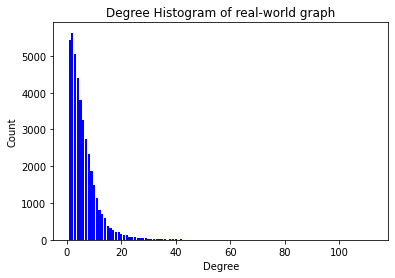

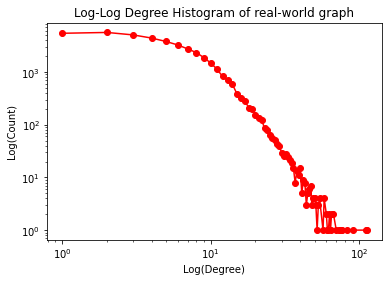

In [4]:
# Call the above function to draw degree histogram
plot_degree_histogram(G, 'real-world graph')

Fit the distribution using power function and straight line

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """


[ 7.54709456e+03 -7.97943487e-01]


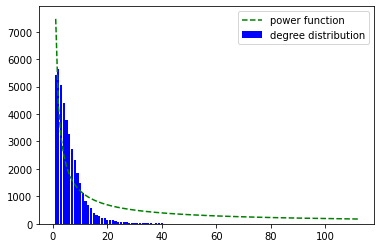

[ 5.47202262 -2.78855987]


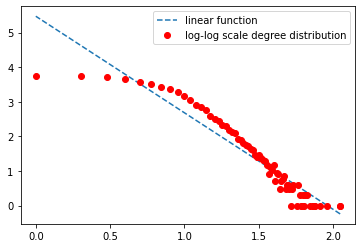

In [5]:
import numpy as np
from scipy.optimize import curve_fit

def powlaw(x, a, b) :
    return a * np.power(x, b)

def linlaw(x, a, b):
    return a + x * b


# get deg and count
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# fit the power function
popt, pcov = curve_fit(powlaw, deg, cnt)
print(popt)

fig, ax = plt.subplots()
plt.plot(deg, powlaw(deg, *popt), '--', color='g')
plt.bar(deg, cnt, width=0.80, color='b')
plt.legend(['power function','degree distribution'])
plt.show()

# fit the linear funciton in log-log scale
popt_log, pcov_log = curve_fit(linlaw, np.log10(deg), np.log10(cnt))
print(popt_log)

plt.plot(np.log10(deg), linlaw(np.log10(deg), *popt_log), '--')
plt.plot(np.log10(deg), np.log10(cnt), 'ro')
plt.legend(['linear function', 'log-log scale degree distribution'])
plt.show()


## 1.3 Average Clustering Coefficients
We can call average_clustering function to calculate the average local clustering of a network. For more details, please refer to: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html

In [6]:
print('average clustering coefficients is {}'.format(nx.average_clustering(G)))

average clustering coefficients is 0.0912123373083256


# 2. Random Graph
We will gerante a random graph with the same number of nodes and similar number of edges with the real-world graphd and analyze its degree distribution and clustering coefficients.

## 2.1 Generate a Random Graph
Assume the real-world graph has n nodes and m edges. To simulate a random graph of n nodes and approximately m edges with G(n,p) model, we set
\begin{equation}
    p = \frac{m}{n \choose 2}
\end{equation}
where ${n \choose 2} = \frac{n\cdot (n-1)}{2}$. With p defined above, we can use the nx.fast_gnp_random_graph(n, p) to generate a random graph with n nodes and approximately m edges. For details of fast_gnp_random_graph(n, p, seed=None, directed=False), please visit: https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html

## <font color='green'>Exercise 1</font>
Please generate a random graph with the same number of nodes and approxmatly the same number of edges as the real-graph in Section 1.1.

In [17]:
# TODO: please fill in following code
import math
p =  num_edges / ((num_nodes*(num_nodes-1))/2)  # probability of forming an edge, use the above equation to calculate
gnp_graph = nx.fast_gnp_random_graph(n=num_nodes, p=p)
print('number of nodes: {}, number of edges: {}'.format(gnp_graph.number_of_nodes(), gnp_graph.number_of_edges()))

number of nodes: 41773, number of edges: 125488


## 2.2 Degree Distribution of Random Graph

## <font color='green'>Exercise 2</font>
Please call plot_degree_histogram to calculate the degree distribution

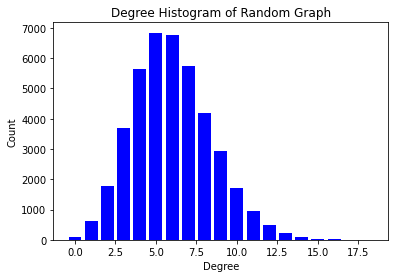

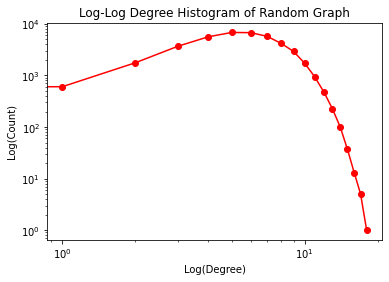

In [18]:
# TODO: call the function to plot the degree distribution
plot_degree_histogram(gnp_graph,'Random Graph')

## 2.3 Clustering Coefficients

In [19]:
print('average clustering coefficients is {}'.format(nx.average_clustering(gnp_graph)))

average clustering coefficients is 6.730702036282193e-05


# Small-World Model
We will gerante a small world model with the same number of nodes, similar number of edges and similar clustering coefficients as the real-world graph in Section 1.1. We will then visualize its degree distribution and calculate its clustering coefficients. The function we use is nx.watts_strogatz_graph(n, k, p), where 
- n: The number of nodes,
- k: Each node is connected to k nearest neighbors in ring topology (degree of the lattice), 
- p: The probability of rewiring each edge 

For more details, please refer to:  in https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html.

## <font color='green'>Exercise 3</font>
Please fill in the following code to generate a small world model with the same number of nodes, similar number of edges and similar clustering coefficients with the real-world graph in Section 1.1. 

Obviously, we should set *n* as the number of nodes of the real graph in Section 1.1. 

*k* should be an integer close to the average degree of the real-world graph. 

For simplicity, we set *p = 0.45*

In [28]:
# TODO: please fill in the following codes
average_degree = sum([d for n, d in G.degree()])/num_nodes
small_world = nx.watts_strogatz_graph(n=num_nodes, k=round(average_degree), p=0.45)
print('number of nodes: {}, number of edges: {}'.format(small_world.number_of_nodes(), small_world.number_of_edges()))

number of nodes: 41773, number of edges: 125319


## <font color='green'>Exercise 4: Degree Distribution of Small World Model</font>

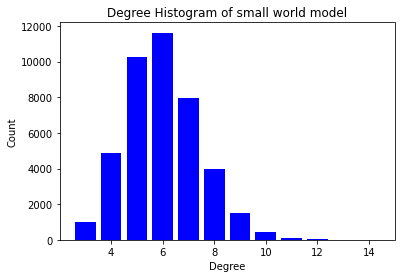

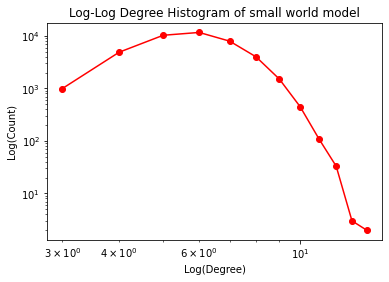

In [30]:
# TODO: Please fill in the following codes
plot_degree_histogram(small_world, 'small world model')

## <font color='green'>Exervise 5: Clustering Coefficients of Small World Model</font>

In [31]:
# TODO: please calcualte the average clustering coefficient of the small world model
print('average clustering coefficients is {}'.format(nx.average_clustering(small_world)))

average clustering coefficients is 0.10268819081927555


# 4 Preferrential Attachment Model
We will generate a scale-free graph with the same number of nodes and simialr number of edges with the real-world graph. We will then analyze its degree distribution.

## 4.1 Generate Scale-Free Graph with Preferrential Attachment Model
We can call barabasi_albert_graph(n, m, seed=None) to generate a scale-free graph, where
- n: The number of nodes,
- m: Number of edges to attach from a new node to existing nodes
- seed : int, optional, Seed for random number generator (default=None).

For more details of barabasi_albert_graph(n, m, seed=None), please visit: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html



Since we want to generate a graph with the same number of nodes as the real graph in Section 1.1, and simialr number of edges with the real graph, we should set

- n to be the number of nodes of the real graph

- m as \begin{equation}
    m \approx \frac{k}{n}
\end{equation}
so that the number of edges will be $m \times n \approx k$, where $k$ is the number of edges of the real world graph

## <font color='green'>Exercise 6: Preferrential Attachment Model</font>
Please call nx.barabasi_albert_graph to generate a preferrential attachment graph with the same number of nodes and similar number of edges with the real-world graph in Section 1.1.

In [34]:
# TODO: Please fill in the code here
preferential_attachment = nx.barabasi_albert_graph(n=num_nodes, m=round((num_edges/num_nodes)))
print('number of nodes: {}, number of edges: {}'.format(preferential_attachment.number_of_nodes(), preferential_attachment.number_of_edges()))

number of nodes: 41773, number of edges: 125310


## 4.2 Degree Distribution of Preferrential Attachment Model

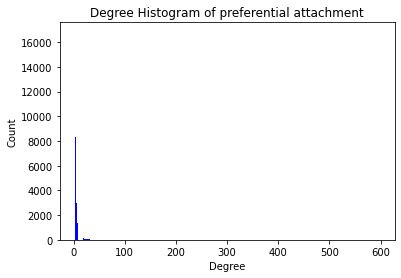

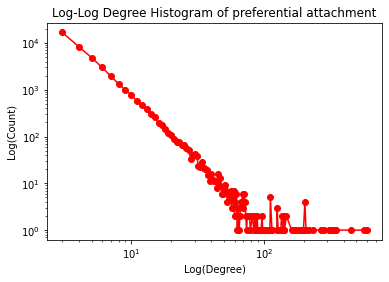

In [35]:
# call the function to plot the degree distribution
plot_degree_histogram(preferential_attachment, 'preferential attachment')

## 4.3 Clustering Coefficients of Preferrential Attachment Model

In [36]:
print('average clustering coefficients is {}'.format(nx.average_clustering(preferential_attachment)))

average clustering coefficients is 0.0015988403372000103


# <font color='green'>Fill In the Report and Submit</font>
Now you have analyzed the real-world graph and simulated three graphs with network models, please fill in the Lab5_Network_Models_Report. Please submit Lab5_Network_Models_Report, this ipynb file and a pdf version to Canvas.

<br>
<br>
<br>
<br>



<br>
<br>
<br>
<br>



# 5. Powerlaw Cluster Graph (Optional, will not be graded)

Powerlaw Cluster Graph is essentially a Barabási–Albert (BA) growth model (also known as preferrential attachment model) with an extra step that each random edge is followed by a chance of making an edge to one of its neighbors too (and thus a triangle). The algorithm is given as

- Initial condition: To start with, the network consists of a small graph with $m_0$ vertices

- Growth: One vertex $v$ with $m$ edges is added at
every time step.

- Preferential attachment (PA): Each edge of $v$ is
then attached to an existing vertex with the probability proportional to its degree, i.e. the probability
for a vertex $w$ to be attached to $v$ is $P(w) = \frac{d_w}{\sum_{k \in V} d_k}$

- Triad formation (TF): If an edge between $v$ and $w$
was added in the previous PA step, then with probability $p$, add one
more edge from $v$ to a randomly chosen neighbor
of $w$. If there remains no pair to connect, i.e., if all
neighbors of $w$ were already connected to $v$, do a
PA step instead.

<img src='https://drive.google.com/uc?id=12o4A1uWfEEOpWMIxcUH8tkhTDM3Q1rww' style='width:100px;height:200px;'>

This algorithm improves on BA in the sense that it enables a higher average clustering to be attained if desired.

## 5.1 Generate Scale-Free Graph with Powerlaw Cluster Graph
We can call powerlaw_cluster_graph(n, m, p, seed=None) to generate the powerlaw cluster graph where
- n: The number of nodes,
- m: Number of edges to attach from a new node to existing nodes
- Probability of adding a triangle after adding a random edge
- seed : int, optional, Seed for random number generator (default=None)

For more details, please refer to https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.powerlaw_cluster_graph.html 

## A comparison between preferrential attachment model and powerlaw cluster graph

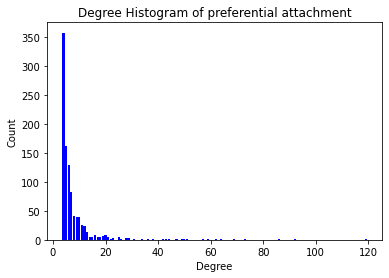

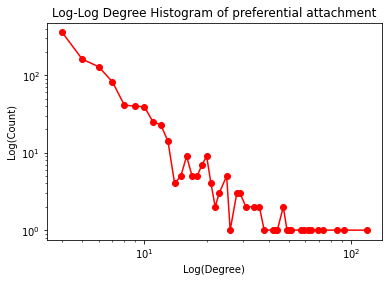

average clustering coefficients is 0.036335238756546734


In [ ]:
# preferrential attachment model
preferential_attachment = nx.barabasi_albert_graph(n=1000, m=4)
plot_degree_histogram(preferential_attachment, 'preferential attachment')
print('average clustering coefficients is {}'.format(nx.average_clustering(preferential_attachment)))

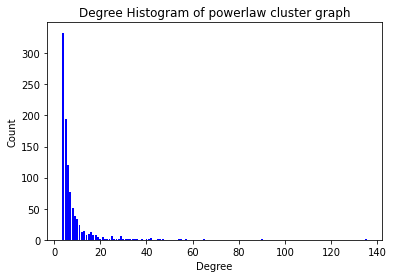

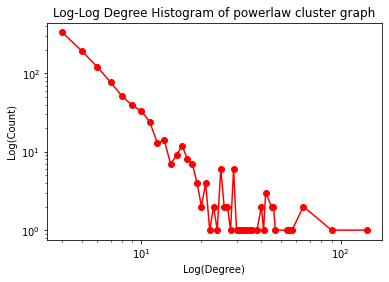

average clustering coefficients is 0.09127439169692193


In [ ]:
# powerlaw cluster graph
powerlaw_cluster_graph = nx.powerlaw_cluster_graph(n=1000, m=4, p=0.15)
plot_degree_histogram(powerlaw_cluster_graph, 'powerlaw cluster graph')
print('average clustering coefficients is {}'.format(nx.average_clustering(powerlaw_cluster_graph)))

## <font color='green'>Exercise 7: Powerlaw Cluster Graph (Optional, will not be graded)
Please call nx.powerlaw_cluster_graph to generate a small world model with the same number of nodes, similar number of edges and similar clustering coefficient with the real-world graph in Section 1.1.

In [ ]:
# TODO: Please fill in the code here
powerlaw_cluster_graph = nx.(n=?????????, m=?????????, p=??????)
print('number of nodes: {}, number of edges: {}'.format(powerlaw_cluster_graph.number_of_nodes(), powerlaw_cluster_graph.number_of_edges()))

## 5.2 Degree Distribution of Powerlaw Cluster Graph

In [ ]:
# call the function to plot the degree distribution
plot_degree_histogram(powerlaw_cluster_graph, 'powerlaw_cluster_graph')

## 5.3 Clustering Coefficients of Powerlaw Cluster Graph

In [ ]:
print('average clustering coefficients is {}'.format(nx.average_clustering(powerlaw_cluster_graph)))